In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import keras
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
test_size = 0.3
val_size = 0.5
train_size =0.7

random_state = 42

In [4]:
data = pd.read_csv('../../data/feature_sets/only_in_game_data_v1.csv')

In [5]:
len(data)

457031

In [6]:
columns_to_drop = [
'riot_match_id',
'min_start_time',

'patch_version',
 'blue_team_id',
 'blue_top_player',
 'blue_jungle_player',
 'blue_mid_player',
 'blue_bot_player',
 'blue_supp_player',
 'red_team_id',
 'red_top_player',
 'red_jungle_player',
 'red_mid_player',
 'red_bot_player',
 'red_supp_player',
 'league',
 'format',
 'game_in_format',
 'season_format',
 'month',
 'day',
 'year'
 ]

In [7]:
extar_info = data[columns_to_drop]
data.drop(columns=columns_to_drop,inplace=True)


In [8]:
pred = data.pop('red_team_outcome')

In [9]:
x_train, x_temp, y_train, y_temp = train_test_split(data,pred,test_size=test_size,random_state = random_state,shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp,test_size = val_size,random_state = random_state,shuffle=True)

In [10]:
assert len(data) == len(x_train) + len(x_test) + len(x_val)
assert len(data) == len(y_train) + len(y_val) + len(y_test)

In [11]:
num_input = len(data.columns)
num_input

115

In [12]:
model = Sequential()
model.add(Dense(1024, input_shape=(num_input,), activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [13]:
patience = 10
learning_rate = 1e-6
epochs = 42
batch_size= 512

In [14]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, verbose=0, mode='min')
mcp_save = keras.callbacks.ModelCheckpoint('mdl_wts.keras', save_best_only=True, monitor='val_loss', mode='min')
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=True, validation_data=(x_val, y_val))

Epoch 1/42
625/625 [==============================] - 9s 12ms/step - loss: 254.5214 - accuracy: 0.5200 - val_loss: 12.7681 - val_accuracy: 0.6717
Epoch 2/42
625/625 [==============================] - 7s 11ms/step - loss: 144.7720 - accuracy: 0.5516 - val_loss: 24.2814 - val_accuracy: 0.5547
Epoch 3/42
625/625 [==============================] - 7s 11ms/step - loss: 99.3218 - accuracy: 0.5718 - val_loss: 18.3581 - val_accuracy: 0.5625
Epoch 4/42
625/625 [==============================] - 7s 11ms/step - loss: 73.5493 - accuracy: 0.5890 - val_loss: 14.7671 - val_accuracy: 0.5776
Epoch 5/42
625/625 [==============================] - 7s 11ms/step - loss: 56.8041 - accuracy: 0.6062 - val_loss: 12.9166 - val_accuracy: 0.5937
Epoch 6/42
625/625 [==============================] - 7s 11ms/step - loss: 44.5773 - accuracy: 0.6204 - val_loss: 12.6612 - val_accuracy: 0.5994
Epoch 7/42
625/625 [==============================] - 7s 12ms/step - loss: 35.7620 - accuracy: 0.6327 - val_loss: 11.1322 - val_

In [16]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2143/2143 [==============================] - 5s 2ms/step - loss: 0.4481 - accuracy: 0.7699
Accuracy: 76.99


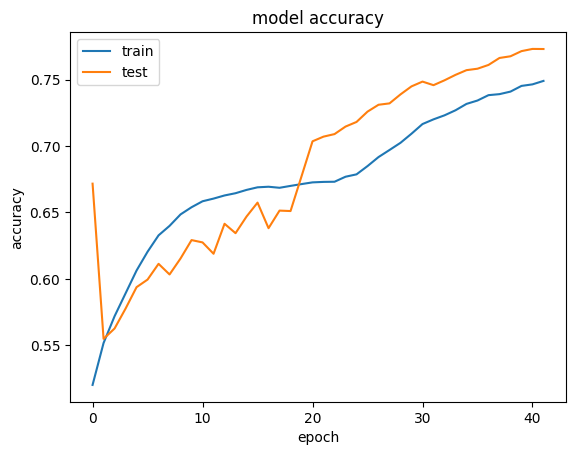

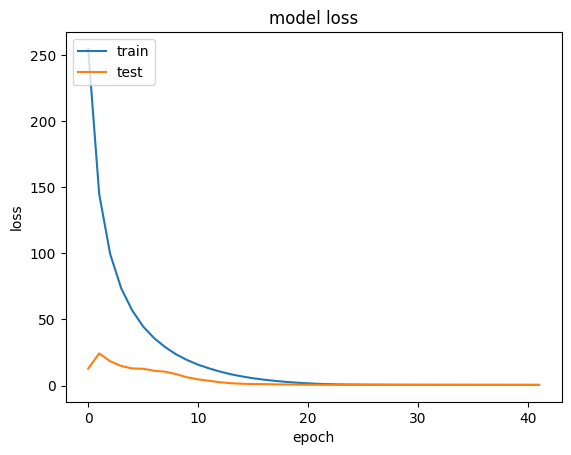

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
test_data = pd.read_csv('../../data/feature_sets/only_in_game_data_v1.csv')


In [19]:
test_pred = test_data.pop('red_team_outcome')


In [20]:
test_extra_info = test_data[columns_to_drop]
test_data.drop(columns=columns_to_drop,inplace=True)


In [21]:
random_rows = test_data.sample(n=5)

In [22]:
random_rows

,blue_team_total_gold,blue_team_inhibitors,blue_team_towers,blue_team_barons,blue_team_total_kills,blue_team_ocean_drakes,blue_team_cloud_drakes,blue_team_mountain_drakes,blue_team_chemtech_drakes,blue_team_infernal_drakes,...,blue_jungle_champ,blue_mid_champ,blue_bot_champ,blue_supp_champ,red_top_champ,red_jungle_champ,red_mid_champ,red_bot_champ,red_supp_champ,time_in_game
126966,15412,0,0,0,2,0,0,0,0,0,...,167,102,78,93,0,112,12,164,109,547.0
34866,54539,0,0,0,3,0,1,0,1,0,...,121,23,78,93,111,74,12,174,171,2038.0
189891,47067,0,4,0,9,1,0,1,0,0,...,83,145,19,9,70,112,102,78,93,1563.0
20988,53562,0,4,0,15,0,0,1,0,1,...,158,1,55,139,118,52,12,174,95,1686.0
77929,54621,0,1,0,9,0,0,0,1,0,...,121,102,132,95,70,83,140,31,58,1919.0


In [23]:
random_rows['index'] = random_rows.index

C:\Users\joshu_rdnqgbx\AppData\Local\Temp\ipykernel_6320\1653804312.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  random_rows['index'] = random_rows.index


In [24]:
test_extra_info.iloc[354393]

riot_match_id                111560983140247875
min_start_time        2024-01-22 16:00:00+00:00
patch_version                               545
blue_team_id                               2173
blue_top_player              105514974275992586
blue_jungle_player           107464179845128878
blue_mid_player               98926509846377469
blue_bot_player              104737951126648199
blue_supp_player             101389760981745081
red_team_id                                2349
red_top_player               105515229738531937
red_jungle_player            105830645287286396
red_mid_player               105554437688383476
red_bot_player               105501834624360050
red_supp_player              102787200059605684
league                                        2
format                                        0
game_in_format                                1
season_format                                 1
month                                         1
day                                     

In [25]:
test_pred.iloc[int(354393.0)]

1

In [26]:
random_rows_predictions = []
for i in range(len(random_rows)):
    print(test_pred.iloc[int(random_rows.iloc[i]['index'])])

0
1
1
1
0


In [27]:
random_rows.drop(columns = 'index',inplace = True)

In [28]:
random_rows_results = model.predict(random_rows)

1/1 [==============================] - 0s 90ms/step


In [29]:
random_rows_results

array([[0.5856761 ],
       [0.82000065],
       [0.83623546],
       [0.6229736 ],
       [0.56385076]], dtype=float32)

In [30]:
all_results = model.predict(test_data)

14283/14283 [==============================] - 17s 1ms/step


In [31]:
threshold_results = []
for result in all_results:
    if result > 0.5:
        threshold_results.append(1)
    else:
        threshold_results.append(0)

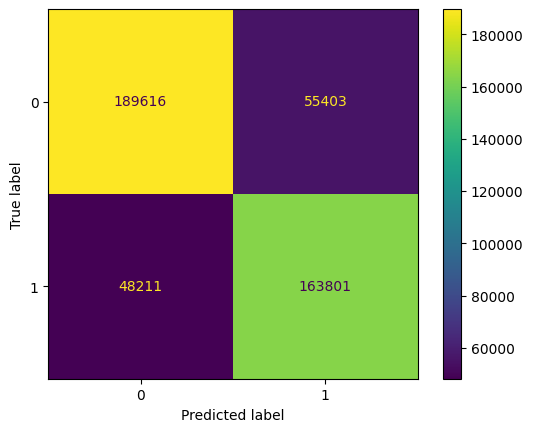

In [32]:
confusion_matrix = metrics.confusion_matrix(test_pred, threshold_results)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

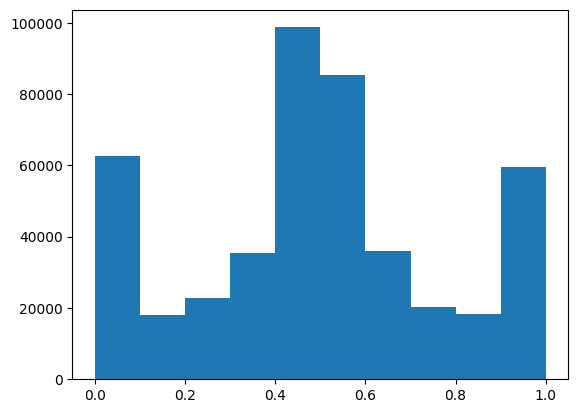

In [33]:
plt.hist(all_results)
plt.show() 

In [34]:
metrics.precision_score(test_pred, threshold_results)


0.7472536997500046

In [35]:
metrics.recall_score(test_pred, threshold_results)


0.7726024941984416

In [36]:
model.save_weights('../saved_models/only_in_game_data_v4.keras')